<a href="https://colab.research.google.com/github/Ragnarok540/sympy-tutorial/blob/main/projectile.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
# https://www.youtube.com/watch?v=b9S_L1AaJNw

import numpy as np
import sympy as smp
import sympy.physics.mechanics as smp_mech
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from matplotlib import animation
from matplotlib.animation import PillowWriter

In [52]:
smp_mech.init_vprinting()

g, t, v_0, mu, theta = smp.symbols('g t v_0 mu theta')
x, y = smp_mech.dynamicsymbols('x y')

x_dot = smp.diff(x, t)
y_dot = smp.diff(y, t)

x_v = - mu * x_dot * smp.sqrt(x_dot**2 + y_dot**2)
y_v = - g - mu * y_dot * smp.sqrt(x_dot**2 + y_dot**2)

In [53]:
f = smp.Matrix([x_dot, y_dot, x_v, y_v])
q = smp.Matrix([x, y, x_dot, y_dot])
q_dot = smp.diff(q, t)

smp.Eq(q_dot, f)

      ⎡          ẋ          ⎤
      ⎢                     ⎥
⎡ẋ⎤   ⎢          ẏ          ⎥
⎢ ⎥   ⎢                     ⎥
⎢ẏ⎥   ⎢        _________    ⎥
⎢ ⎥ = ⎢       ╱  2    2     ⎥
⎢ẍ⎥   ⎢  -μ⋅╲╱  ẋ  + ẏ  ⋅ẋ  ⎥
⎢ ⎥   ⎢                     ⎥
⎣ÿ⎦   ⎢          _________  ⎥
      ⎢         ╱  2    2   ⎥
      ⎣-g - μ⋅╲╱  ẋ  + ẏ  ⋅ẏ⎦

In [54]:
v_0x = v_0 * smp.cos(theta)
v_0y = v_0 * smp.sin(theta)

def init_conditions(pos_x, pos_y, speed, angle):
  fun_x = v_0x.subs([(v_0, speed), (theta, angle * smp.pi / 180)])
  l_fun_x = smp.lambdify([], fun_x)
  fun_y = v_0y.subs([(v_0, speed), (theta, angle * smp.pi / 180)])
  l_fun_y = smp.lambdify([], fun_y)
  return [pos_x, pos_y, l_fun_x(), l_fun_y()]

init_conditions(0, 0, 10, 30)

[0, 0, 8.660254037844386, 5]

In [55]:
fun_2 = f[2].subs([(mu, 1)])
l_fun_2 = smp.lambdify([x_dot, y_dot], fun_2)

fun_3 = f[3].subs([(g, 9.81), (mu, 1)])
l_fun_3 = smp.lambdify([x_dot, y_dot], fun_3)

def projectile(t, S):
    x, y, vx, vy = S
    return [vx,
            vy,
            l_fun_2(vx, vy),
            l_fun_3(vx, vy)]

t_eval=np.linspace(0, 2, 1000)

sol1 = solve_ivp(projectile, [0, 2], y0=init_conditions(0, 0, 10, 40), t_eval=t_eval)
sol2 = solve_ivp(projectile, [0, 2], y0=init_conditions(0, 0, 10, 45), t_eval=t_eval)
sol3 = solve_ivp(projectile, [0, 2], y0=init_conditions(0, 0, 10, 50), t_eval=t_eval)

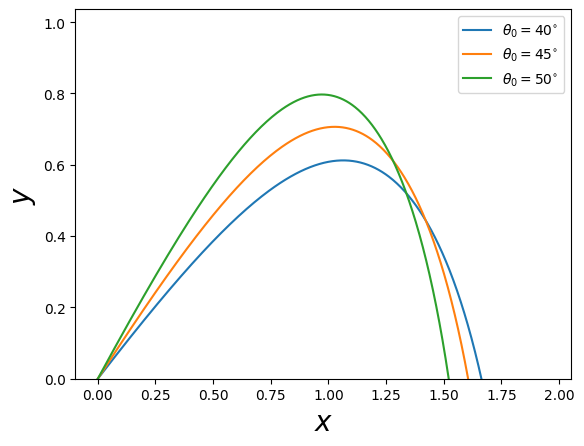

In [56]:
plt.plot(sol1.y[0], sol1.y[1], label=r'$\theta_0=40^{\circ}$')
plt.plot(sol2.y[0], sol2.y[1], label=r'$\theta_0=45^{\circ}$')
plt.plot(sol3.y[0], sol3.y[1], label=r'$\theta_0=50^{\circ}$')
plt.ylim(bottom=0)
plt.legend()
plt.xlabel('$x$', fontsize=20)
plt.ylabel('$y$', fontsize=20)
plt.show()

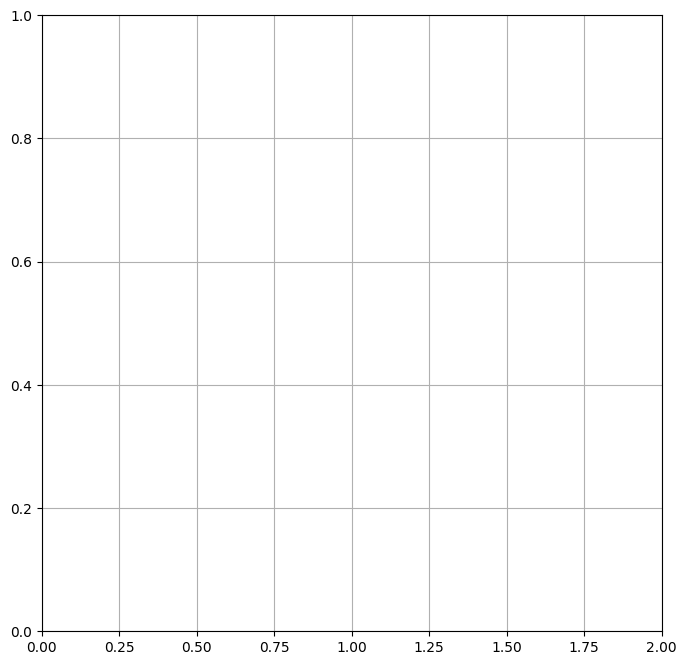

In [66]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.grid()
ln1, = plt.plot([])
ln2, = plt.plot([])
ln3, = plt.plot([])
ax.set_ylim(0, 1)
ax.set_xlim(0, 2)

def animate(i):
    ln1.set_data([sol1.y[0][0:i], sol1.y[1][0:i]])
    ln2.set_data([sol2.y[0][0:i], sol2.y[1][0:i]])
    ln3.set_data([sol3.y[0][0:i], sol3.y[1][0:i]])


ani = animation.FuncAnimation(fig, animate, frames=1000, interval=50)
ani.save('projectile.gif', writer='pillow', fps=30)